In [13]:
!pip install geopandas scikit-learn matplotlib kneed

In [11]:
import geopandas as gpd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

In [3]:
trees = gpd.read_file('./pine_tree_metrics_convex.geojson')

In [4]:
trees

,treeID,Total_all_return_count,Total_first_return_count,Total_all_return_count_above_minht,Return_1_count_above_minht,Return_2_count_above_minht,Return_3_count_above_minht,Return_4_count_above_minht,Return_5_count_above_minht,Return_6_count_above_minht,...,Percentage_first_returns_above_mode,Percentage_all_returns_above_mean,Percentage_all_returns_above_mode,X_All_returns_above_mean_Total_first_returns_100,X_All_returns_above_mode_Total_first_returns_100,First_returns_above_mean,First_returns_above_mode,All_returns_above_mean,All_returns_above_mode,geometry
0,1.0,255,183,255,183,63,9,0,0,0,...,52.941176,58.431373,56.078431,81.420765,78.142077,139,135,149,143,"POLYGON ((365744.63 3979597.97, 365744.46 3979..."
1,2.0,454,347,449,343,89,17,0,0,0,...,11.453744,60.792952,11.453744,79.538905,14.985591,255,52,276,52,"POLYGON ((365716.46 3979596.61, 365716.12 3979..."
2,3.0,200,158,200,158,40,2,0,0,0,...,19.500000,56.500000,19.500000,71.518987,24.683544,104,39,113,39,"POLYGON ((365623.78 3979599.25, 365623.7 39795..."
3,4.0,130,124,130,124,6,0,0,0,0,...,46.153846,46.153846,46.153846,48.387097,48.387097,60,60,60,60,"POLYGON ((365750.62 3979593.61, 365750.47 3979..."
4,5.0,634,406,633,406,181,45,1,0,0,...,13.880126,53.943218,13.880126,84.236453,21.674877,303,88,342,88,"POLYGON ((365667.55 3979593.65, 365667.24 3979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,712.0,512,377,511,377,119,15,0,0,0,...,9.179688,54.687500,9.179688,74.270557,12.466844,257,47,280,47,"POLYGON ((365581.78 3979593.7, 365581.15 39795..."
683,713.0,201,131,201,131,62,8,0,0,0,...,53.731343,46.766169,64.179104,71.755725,98.473282,84,108,94,129,"POLYGON ((365551.78 3979595.21, 365551.73 3979..."
684,714.0,429,254,429,254,137,38,0,0,0,...,38.927739,64.801865,42.890443,109.448819,72.440945,219,167,278,184,"POLYGON ((365610.58 3979595.19, 365610.49 3979..."
685,715.0,420,312,420,312,99,9,0,0,0,...,39.047619,60.238095,40.952381,81.089744,55.128205,231,164,253,172,"POLYGON ((365599.73 3979597.9, 365598.69 39795..."


Text(0.5, 1.0, 'Elbow curve')

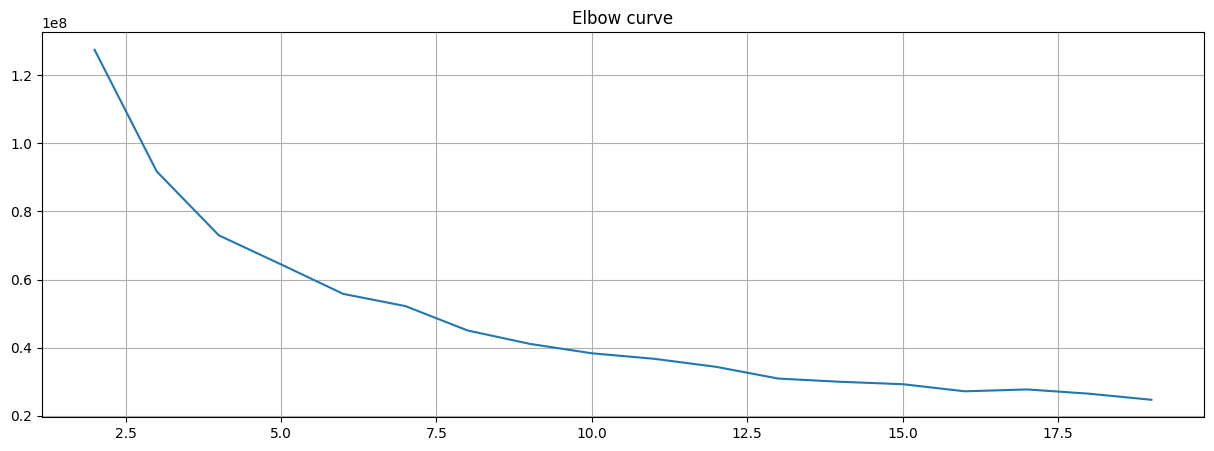

In [14]:
X = trees.iloc[:, 1:-1]
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')